<a href="https://colab.research.google.com/github/RulerScarlett/Datacon-ML-task-4/blob/main/%D0%9F%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0%20%D1%81%D0%B3%D0%B5%D0%BD%D0%B5%D1%80%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%BC%D0%BE%D0%BB%D0%B5%D0%BA%D1%83%D0%BB%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D0%B5%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''%pip install google-colab-selenium[undetected]
%pip install requests_html
%pip install lxml_html_clean
!pyppeteer-install
'''
#%pip install rdkit
!pip install "networkx==2.3" "decorator==4.3.0" "numpy<1.24" mordred[full] rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 43.5 MB/s eta 0:00:00
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1555998 sha256=06a6f17c87be44449c194a5faa6dc8662508630df570c385589fa73fef25910b
  Stored in directory: /root/.cache/pip/wheels/2c/37/e7/4605d8245bedc0a0450fc73e5a07e1d1696301f2f3ba10788c
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176718 sha256=5f80818bdc46ac67008ccc633b74aa470d746a96a51dd51f9e008a702e7afa51
  Stored in directory: /root/.cache/pip/wheels/8b/30/0b/84e3f6775306e74cf5957ee4d16b10bf3927dcec44cc23d5f2
Successfully built networkx mordred
  Attempting uninstall: decorator
    F

** ГЕНЕРИРУЕМ ДЕСКРИПТОРЫ ПО СМАЙЛС **




In [1]:
import sys
import math
from fractions import Fraction
from unittest.mock import patch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import os
import pandas as pd
from rdkit import Chem

# Исправление для numpy.float
if not hasattr(np, 'float'):
    np.float = float

# Исправление для fractions.gcd
sys.modules['fractions'].gcd = math.gcd

with patch('networkx.algorithms.dag.gcd', math.gcd):
    from mordred import Calculator, descriptors

calc = Calculator(descriptors, ignore_3D=True)

 # Предыдущий ДФ
parsed_file_path = '/content/hash_ligand_mapping.csv'

 # ДФ с Дескрипторами
desc_file_path = '/content/Full_desc_df.csv'

orig_file_path = '/content/dataset.csv'



 # Функция добавления дескрипторов в ДФ со смайлс
def desc_maker():
  df = pd.read_csv(parsed_file_path, sep=',', header=None)
  df.columns=['hash', 'Smiles']
  print(df.info)

   # Пустой ДФ с названиями столбцов
  global desc1
  desc1 = pd.DataFrame.from_dict([dict(calc(Chem.MolFromSmiles(df['Smiles'][0])))])
  desc = pd.DataFrame(columns=desc1.columns)
  print(desc)

   # Делаем ДФ с дескрипторами
  for index, row in df.iterrows():
    mol = Chem.MolFromSmiles(df['Smiles'][index])

     # Вырезаем строчку если по ней нельзя рассчитать дескрипторы
    try:
      desc = pd.concat([desc, pd.DataFrame.from_dict([dict(calc(mol))])], ignore_index=True)
    except Exception:
      df.drop(index)

   # Проверяем что размерности ДФ совпадают
  print(df.info)
  print(desc.info)

   # записываем в CSV файл все дескрипторы
  with open('Parsed_data_descs.csv', 'w', newline='', encoding='utf-8'):
    desc.to_csv('Parsed_data_descs.csv', sep = ';', columns = desc1.columns, index = False)

   # записываем в CSV файл новый SMiles ДФ
  with open('hash_ligand_mapping.csv', 'w', newline='', encoding='utf-8'):
    df.to_csv('hash_ligand_mapping.csv', sep = ';', columns = ['hash', 'Smiles'], index = False)
  df = pd.concat([df, desc], axis=1)
  print(df)
  with open('Full_desc_df.csv', 'w', newline='', encoding='utf-8'):
    df.to_csv('Full_desc_df.csv', sep = ';', index = False)
  print(df.info)


 # Фильтр-функция
def filter():
  df = pd.read_csv(desc_file_path, sep=';', on_bad_lines='skip')
  print(df.info)
  print(type(df['nAcid'][0]))

   # Фильтр колонок признаков, оставляющим только числовые значения
  str_cols=df.columns[:2]
  num_cols=df.columns[2:]
  df = pd.concat([df[str_cols], df[num_cols].select_dtypes(include=[np.number])], axis=1)
  print(df)

  dforig = pd.read_csv(orig_file_path, sep=';')
  print(dforig)
  cols_include = dforig.columns[3:]
  print(cols_include)
  print(df[cols_include])
  df = pd.concat([df[df.columns[:2]], df[cols_include]], axis=1)
  print(df)

  with open('dataset1.csv', 'w', newline='', encoding='utf-8'):
    df.to_csv('/content/dataset1.csv', sep = ';', index = False)



/tmp/ipython-input-1-3990270912.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not hasattr(np, 'float'):


In [2]:
desc_maker()

<bound method DataFrame.info of                                          hash  \
0    46e6805f3b2ce283909854317cd55fd580dc8e4c   
1    84b30a2d3ef3851f3bb504a3f563c7a2939ee4ff   
2    0f255723b6278d75a1a79930eda2ab690ea4ba30   
3    a0e3f2b18f1b7ccf890d5df3baf69c32ed58d6ed   
4    184bfd1cfc27216d09a4d0e8c83da7ee7e80e016   
..                                        ...   
197  33cc3c3de4badd389bc5c1cf02eb63f60d0942ce   
198  0e9abd0f18f90e9f051a3592b331b444e8aba0b9   
199  df869f1308f4a40e0ea43c83688255ce7477c922   
200  3548962175e5d2548665d66f2ca9c6cf86a10199   
201  bba17f892d410fc34542ced19f4844684520c3f7   

                                                Smiles  
0    CS(=O)(=O)c1ccc(cc1)C1=C(CC2(CC2)C1)c1ccc(F)c(...  
1    CS(=O)(=O)c1ccc(cc1)-c1cnn(Cc2ccncc2)c(=O)c1-c...  
2    Cc1c(NCc2ccco2)cc(-c2ccc(cc2)S(C)(=O)=O)n1-c1c...  
3    NS(=O)(=O)c1ccc(cc1)-c1[nH]c2ccc(F)cc2c1-c1ccccc1  
4    NS(=O)(=O)c1ccc(cc1)N1N=C2C(CCc3ccccc23)C1c1cc...  
..                                   

/tmp/ipython-input-1-3990270912.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  desc = pd.concat([desc, pd.DataFrame.from_dict([dict(calc(mol))])], ignore_index=True)


<bound method DataFrame.info of                                          hash  \
0    46e6805f3b2ce283909854317cd55fd580dc8e4c   
1    84b30a2d3ef3851f3bb504a3f563c7a2939ee4ff   
2    0f255723b6278d75a1a79930eda2ab690ea4ba30   
3    a0e3f2b18f1b7ccf890d5df3baf69c32ed58d6ed   
4    184bfd1cfc27216d09a4d0e8c83da7ee7e80e016   
..                                        ...   
197  33cc3c3de4badd389bc5c1cf02eb63f60d0942ce   
198  0e9abd0f18f90e9f051a3592b331b444e8aba0b9   
199  df869f1308f4a40e0ea43c83688255ce7477c922   
200  3548962175e5d2548665d66f2ca9c6cf86a10199   
201  bba17f892d410fc34542ced19f4844684520c3f7   

                                                Smiles  
0    CS(=O)(=O)c1ccc(cc1)C1=C(CC2(CC2)C1)c1ccc(F)c(...  
1    CS(=O)(=O)c1ccc(cc1)-c1cnn(Cc2ccncc2)c(=O)c1-c...  
2    Cc1c(NCc2ccco2)cc(-c2ccc(cc2)S(C)(=O)=O)n1-c1c...  
3    NS(=O)(=O)c1ccc(cc1)-c1[nH]c2ccc(F)cc2c1-c1ccccc1  
4    NS(=O)(=O)c1ccc(cc1)N1N=C2C(CCc3ccccc23)C1c1cc...  
..                                   

In [3]:
filter()

<bound method DataFrame.info of                                          hash  \
0    46e6805f3b2ce283909854317cd55fd580dc8e4c   
1    84b30a2d3ef3851f3bb504a3f563c7a2939ee4ff   
2    0f255723b6278d75a1a79930eda2ab690ea4ba30   
3    a0e3f2b18f1b7ccf890d5df3baf69c32ed58d6ed   
4    184bfd1cfc27216d09a4d0e8c83da7ee7e80e016   
..                                        ...   
197  33cc3c3de4badd389bc5c1cf02eb63f60d0942ce   
198  0e9abd0f18f90e9f051a3592b331b444e8aba0b9   
199  df869f1308f4a40e0ea43c83688255ce7477c922   
200  3548962175e5d2548665d66f2ca9c6cf86a10199   
201  bba17f892d410fc34542ced19f4844684520c3f7   

                                                Smiles        ABC      ABCGG  \
0    CS(=O)(=O)c1ccc(cc1)C1=C(CC2(CC2)C1)c1ccc(F)c(...  20.271155  16.250039   
1    CS(=O)(=O)c1ccc(cc1)-c1cnn(Cc2ccncc2)c(=O)c1-c...  23.656859  17.872189   
2    Cc1c(NCc2ccco2)cc(-c2ccc(cc2)S(C)(=O)=O)n1-c1c...  23.766249  18.861484   
3    NS(=O)(=O)c1ccc(cc1)-c1[nH]c2ccc(F)cc2c1-c1ccccc1  20.

In [4]:
import sys
import math
from fractions import Fraction
from unittest.mock import patch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import os
import pandas as pd
from lightgbm import LGBMRegressor
import joblib


# Исправление для numpy.float
if not hasattr(np, 'float'):
    np.float = float

# Исправление для fractions.gcd
sys.modules['fractions'].gcd = math.gcd


 # ДФ ДАТАСЕТА СО СГЕНЕРИРОВАННЫМИ МОЛЕКУЛАМИ
dataset_path = '/content/dataset1.csv'



df = pd.read_csv(dataset_path, sep=';', on_bad_lines='skip')
def preparedf():

  df = pd.read_csv(dataset_path, sep=';', on_bad_lines='skip')
   # Стандартизация
  df = df.drop(columns = df.columns[:2])
  df = df.astype(np.float32)
  print(df.dtypes)
  df = df.select_dtypes(include=[np.number])

  #indexes = np.isinf(df).any(axis=1)
  #print(indexes)
  #df = df.drop(indexes)
  print(df)


  indexes=[]

  for index, row in df.iterrows():
    if row.isna().any() or np.isinf(row.values).any():
      indexes.append(index)
  df = df.drop(indexes, axis=0)


  print(df)
  df = df


  return df

dfs = preparedf()


 # Делаем тестовые дф
def make_train():
  df = dfs

   # x - все столбцы с дескрипторами
  x = df
  x_test = x
  print(" Test:", x_test.shape)
  return x_test
make_train()

ABC               float32
nAcid             float32
nBase             float32
nAromAtom         float32
nSpiro            float32
                   ...   
n10FaRing         float32
nFARing           float32
n9FARing          float32
n10FARing         float32
TopoShapeIndex    float32
Length: 162, dtype: object
           ABC  nAcid  nBase  nAromAtom  nSpiro  nBridgehead   nN   nS   nP  \
0    20.271154    0.0    0.0       12.0     1.0          0.0  0.0  1.0  0.0   
1    23.656858    0.0    0.0       24.0     0.0          0.0  3.0  1.0  0.0   
2    23.766249    0.0    0.0       22.0     0.0          0.0  2.0  1.0  0.0   
3    20.828432    0.0    0.0       21.0     0.0          0.0  2.0  1.0  0.0   
4    25.059143    0.0    0.0       18.0     0.0          0.0  3.0  1.0  0.0   
..         ...    ...    ...        ...     ...          ...  ...  ...  ...   
197  25.760153    1.0    0.0       18.0     0.0          0.0  2.0  0.0  0.0   
198  17.373779    0.0    0.0       17.0     0.0        

/tmp/ipython-input-4-2531709996.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not hasattr(np, 'float'):


,ABC,nAcid,nBase,nAromAtom,nSpiro,nBridgehead,nN,nS,nP,nF,...,nFRing,n8FRing,n9FRing,n10FRing,nG12FRing,n10FaRing,nFARing,n9FARing,n10FARing,TopoShapeIndex
0,20.271154,0.0,0.0,12.0,1.0,0.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
1,23.656858,0.0,0.0,24.0,0.0,0.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
2,23.766249,0.0,0.0,22.0,0.0,0.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.857143
3,20.828432,0.0,0.0,21.0,0.0,0.0,2.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333
4,25.059143,0.0,0.0,18.0,0.0,0.0,3.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,25.760153,1.0,0.0,18.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.888889
198,17.373779,0.0,0.0,17.0,0.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333
199,23.875639,0.0,0.0,18.0,0.0,0.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.857143
200,23.766249,0.0,0.0,17.0,0.0,0.0,4.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.857143


In [5]:
dfs = preparedf()
print(dfs)

ABC               float32
nAcid             float32
nBase             float32
nAromAtom         float32
nSpiro            float32
                   ...   
n10FaRing         float32
nFARing           float32
n9FARing          float32
n10FARing         float32
TopoShapeIndex    float32
Length: 162, dtype: object
           ABC  nAcid  nBase  nAromAtom  nSpiro  nBridgehead   nN   nS   nP  \
0    20.271154    0.0    0.0       12.0     1.0          0.0  0.0  1.0  0.0   
1    23.656858    0.0    0.0       24.0     0.0          0.0  3.0  1.0  0.0   
2    23.766249    0.0    0.0       22.0     0.0          0.0  2.0  1.0  0.0   
3    20.828432    0.0    0.0       21.0     0.0          0.0  2.0  1.0  0.0   
4    25.059143    0.0    0.0       18.0     0.0          0.0  3.0  1.0  0.0   
..         ...    ...    ...        ...     ...          ...  ...  ...  ...   
197  25.760153    1.0    0.0       18.0     0.0          0.0  2.0  0.0  0.0   
198  17.373779    0.0    0.0       17.0     0.0        

In [6]:
x_pred = make_train()

 Test: (202, 162)


In [7]:
import sys
import math
from fractions import Fraction
from unittest.mock import patch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import os
import pandas as pd
from lightgbm import LGBMRegressor
import joblib

# Исправление для numpy.float
if not hasattr(np, 'float'):
    np.float = float

# Исправление для fractions.gcd
sys.modules['fractions'].gcd = math.gcd





 # ЗАГРУЗИТЕ ДАТАСЕТ В ВИДЕ ФАЙЛА С ПРЕДЫДУЩЕГО ТАСКА
 # ДФ ДАТАСЕТА
dataset_path = '/content/dataset.csv'



df = pd.read_csv(dataset_path, sep=';', on_bad_lines='skip')
def preparedf():

  df = pd.read_csv(dataset_path, sep=';', on_bad_lines='skip')

   # Логарифмируем Standard Value
  df.iloc[:, 2] = np.log10(df.iloc[:, 2])
  print(df.iloc[:, 2])


   # Стандартизация
  df = df.drop(columns = df.columns[:2])
  df = df.astype(np.float32)
  print(df.dtypes)
  df = df.select_dtypes(include=[np.number])
  indexes=[]
  for index, row in df.iterrows():
    if (np.isnan(df['Standard Value'][index]) or np.isinf(df['Standard Value'][index])):
      indexes.append(index)
  df = df.drop(indexes, axis=0)
  print(df)
  df = df
  return df
dfs = preparedf()


 # Делаем обучающую выборку, одинаково для всех моделей
def make_train():
  df = dfs

   # x - все столбцы с дескрипторами
   # y - только столбец значений IC50
  x = df.drop(columns = ['Standard Value'])
  y = df['Standard Value']
  print("Number of NaN values in y:", df['Standard Value'].isna().sum())

  bins = pd.qcut(y, q=10, duplicates="drop", labels=False)
  x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=bins
  )
  print("Train:", x_train.shape, " Test:", x_test.shape)
  return x_train, x_test, y_train, y_test
make_train()





seed=42

/tmp/ipython-input-7-373520211.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not hasattr(np, 'float'):
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       1.602060
1       3.230449
2       1.698970
3       3.653213
4       2.278754
          ...   
4170    5.112940
4171    1.000000
4172    4.167317
4173    3.876795
4174    2.944483
Name: Standard Value, Length: 4175, dtype: float64
Standard Value    float32
ABC               float32
nAcid             float32
nBase             float32
nAromAtom         float32
                   ...   
n10FaRing         float32
nFARing           float32
n9FARing          float32
n10FARing         float32
TopoShapeIndex    float32
Length: 163, dtype: object
      Standard Value        ABC  nAcid  nBase  nAromAtom  nSpiro  nBridgehead  \
0           1.602060  19.751326    0.0    0.0        6.0     0.0          0.0   
1           3.230449  19.495098    0.0    0.0       18.0     0.0          0.0   
2           1.698970  22.074789    0.0    0.0       15.0     0.0          0.0   
3           3.653213  17.848785    0.0    0.0        6.0     0.0          0.0   
4           2.278754  31.554907    0.0    0.

In [8]:
dfs = preparedf()
print(dfs)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       1.602060
1       3.230449
2       1.698970
3       3.653213
4       2.278754
          ...   
4170    5.112940
4171    1.000000
4172    4.167317
4173    3.876795
4174    2.944483
Name: Standard Value, Length: 4175, dtype: float64
Standard Value    float32
ABC               float32
nAcid             float32
nBase             float32
nAromAtom         float32
                   ...   
n10FaRing         float32
nFARing           float32
n9FARing          float32
n10FARing         float32
TopoShapeIndex    float32
Length: 163, dtype: object
      Standard Value        ABC  nAcid  nBase  nAromAtom  nSpiro  nBridgehead  \
0           1.602060  19.751326    0.0    0.0        6.0     0.0          0.0   
1           3.230449  19.495098    0.0    0.0       18.0     0.0          0.0   
2           1.698970  22.074789    0.0    0.0       15.0     0.0          0.0   
3           3.653213  17.848785    0.0    0.0        6.0     0.0          0.0   
4           2.278754  31.554907    0.0    0.

In [9]:
x_train, x_test, y_train, y_test = make_train()

Number of NaN values in y: 0
Train: (3334, 162)  Test: (834, 162)


In [16]:
from sklearn.ensemble import RandomForestRegressor

 # RandomForestRegressor из scikit-learn
forest = RandomForestRegressor(random_state=seed)
forest.fit(x_train, y_train)

y_pred = forest.predict(x_test)

mae = sk.metrics.mean_absolute_error(y_test, forest.predict(x_test))
r2  = sk.metrics.r2_score(y_test, forest.predict(x_test))

 # Просим модель предсказать pValue
y_mols = forest.predict(x_pred)

print(f"forest MAE: {mae:.4f}")
print(f"forest R2 : {r2:.4f}")

KeyboardInterrupt: 

In [11]:
 # ДФ ДАТАСЕТА
dataset_path = '/content/dataset1.csv'


 #  Соединиям столбцы смайлс и pValue в дф
df = pd.read_csv(dataset_path, sep=';', on_bad_lines='skip')
def concat_mols():
  y_mol=y_mols
  df = pd.read_csv(dataset_path, sep=';', on_bad_lines='skip')
  df = df.drop(columns = df.columns[2:])
  y_mol = pd.DataFrame(y_mols)
  print(y_mol)
  y_mol.columns=['pValue']
  df = pd.concat([df, y_mol], axis=1)
  with open('Promising_mols.csv', 'w', newline='', encoding='utf-8'):
    df.to_csv('/content/Promising_mols.csv', sep = ';', index = False)
  return df

In [12]:
concat_mols()

            0
0    0.633403
1    3.053359
2    2.823322
3    0.287221
4    4.231350
..        ...
197  3.069757
198  2.478138
199  3.496579
200  2.533136
201  3.714785

[202 rows x 1 columns]


,hash,Smiles,pValue
0,46e6805f3b2ce283909854317cd55fd580dc8e4c,CS(=O)(=O)c1ccc(cc1)C1=C(CC2(CC2)C1)c1ccc(F)c(...,0.633403
1,84b30a2d3ef3851f3bb504a3f563c7a2939ee4ff,CS(=O)(=O)c1ccc(cc1)-c1cnn(Cc2ccncc2)c(=O)c1-c...,3.053359
2,0f255723b6278d75a1a79930eda2ab690ea4ba30,Cc1c(NCc2ccco2)cc(-c2ccc(cc2)S(C)(=O)=O)n1-c1c...,2.823322
3,a0e3f2b18f1b7ccf890d5df3baf69c32ed58d6ed,NS(=O)(=O)c1ccc(cc1)-c1[nH]c2ccc(F)cc2c1-c1ccccc1,0.287221
4,184bfd1cfc27216d09a4d0e8c83da7ee7e80e016,NS(=O)(=O)c1ccc(cc1)N1N=C2C(CCc3ccccc23)C1c1cc...,4.231350
...,...,...,...
197,33cc3c3de4badd389bc5c1cf02eb63f60d0942ce,Cc1c(CCC(O)=O)cccc1NC(=O)C(C1CCC1)c1ccc(cc1)-c...,3.069757
198,0e9abd0f18f90e9f051a3592b331b444e8aba0b9,Cc1nc(c(s1)-c1ccc(cc1)S(C)(=O)=O)-c1ccccc1,2.478138
199,df869f1308f4a40e0ea43c83688255ce7477c922,NS(=O)(=O)c1ccc(cc1)N1N=C(CC1c1ccc(Cl)cc1)c1cc...,3.496579
200,3548962175e5d2548665d66f2ca9c6cf86a10199,NS(=O)(=O)c1ccc(cc1)-n1nc(cc1-c1cccc(Br)c1)C(=...,2.533136


In [13]:
from rdkit import Chem
from rdkit.Contrib.SA_Score import sascorer
from rdkit.Chem import FilterCatalog
from rdkit.Chem.FilterCatalog import FilterCatalogParams
from rdkit.Chem import Descriptors
from IPython.display import display
from rdkit.Chem import Draw

params = FilterCatalogParams()
params.AddCatalog(FilterCatalogParams.FilterCatalogs.BRENK)
catalog = FilterCatalog.FilterCatalog(params)
df = concat_mols()


     # Функция проверки по 4 критериям
def checker(df):
  dfs=df
  indexes=[]
  for index, row in dfs.iterrows():

    mol = Chem.MolFromSmiles(dfs['Smiles'][index])
    MW = Descriptors.MolWt(mol)
    HBA = Descriptors.NOCount(mol)
    HBD = Descriptors.NHOHCount(mol)
    LogP = Descriptors.MolLogP(mol)
    print(Chem.QED.qed(mol))
    if (dfs['pValue'][index] < 3) or (Chem.QED.qed(mol) < 0.5) or ((sascorer.calculateScore(mol) < 6) and (sascorer.calculateScore(mol) > 2)) or (catalog.HasMatch(mol) == True) or ((MW <= 500 and LogP <= 5 and HBD <= 5 and HBA <= 10) == False):
      indexes.append(index)
  df = dfs.drop(indexes)
  print(df)

  for index, row in df.iterrows():
    mol = Chem.MolFromSmiles(dfs['Smiles'][index])
    img = Draw.MolToImage(mol, size=(300,300))
    display(img)


  with open('selected_hits.csv', 'w', newline='', encoding='utf-8'):
    df.to_csv('/content/selected_hits.csv', sep = ';', index = False)



            0
0    0.633403
1    3.053359
2    2.823322
3    0.287221
4    4.231350
..        ...
197  3.069757
198  2.478138
199  3.496579
200  2.533136
201  3.714785

[202 rows x 1 columns]


0.7838044787605938
0.4969278613603525
0.46204776365960676
0.5674611080108655
0.5717195828399025
0.6445078196320666
0.7541053298167572
0.6564526225700846
0.5309349396704287
0.6421451726835583
0.44577499346331556
0.3815841488919274
0.4393214106877799
0.6088275301257335
0.5780074372919368
0.454270671934762
0.33941148817699
0.6745281867480443
0.5680403174878074
0.6542426122716517
0.5794982960338307
0.7814841613090309
0.668313791464954
0.6970321098367658
0.44823913643632757
0.7026830395385886
0.6955130819928682
0.3921590419460373
0.3993500335290694
0.7781674418136367
0.5395310552172355
0.617069787850311
0.6867915352474574
0.6445078196320666
0.7214255817301607
0.20125291797675618
0.5229778332516829
0.5813648423304828
0.64910958637353
0.5863734813426511
0.6967488752482298
0.406013432735009
0.6031878618920872
0.3839806174648607
0.7339387257734852
0.6445078196320666
0.661768594252516
0.15999599030320757
0.7989347522249428
0.6673839172559926
0.5268470220724798
0.7214204419650235
0.38398061746486

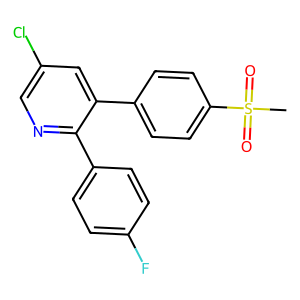

In [14]:
checker(df)